# Requirements #

* clone HalphaImaging repository
* assuming github repositories are in : ~/github/
* galfit
* swarp



# Modeling WISE Images with GALFIT #


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.table import Table
from astropy.wcs import WCS
import time

In [2]:
homedir = os.getenv("HOME")

# Setting up path and names for Virgo Catalogs #

- set the table dir to point to the Virgo directory where you are storing the tables
- the table prefix is set to 'vf_north_v0_'.  You might need to update this as the table versions are updated.

In [3]:
virgodir = homedir+'/research/Virgo/'
tabledir = virgodir+'/tables-north/v1/'
anciltabledir = virgodir+'/ancil-tables/'
tableprefix = 'vf_north_v1_'

# Read in Virgo Catalogs #

- we will need the main file
- and maybe unwise table?

In [4]:
%run /home/rfinn/github/Virgo/programs/readtables.py

In [5]:
v.main

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes38,bytes8
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,0,0,0,NGC 4363,True,False,False,False,False,False,False,True,False,False,VFID0000-NGC4363,VFID0000
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,0,0,0,NGC 4133,True,False,False,False,False,False,False,True,True,False,VFID0001-NGC4133,VFID0001
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,0,0,0,NGC 2977,True,False,False,False,False,False,False,True,True,False,VFID0002-NGC2977,VFID0002
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,0,0,0,CGCG 352-030,True,False,False,False,False,False,False,True,False,False,VFID0003-CGCG352-030,VFID0003
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,0,0,0,UGC 07189,True,False,False,False,False,False,False,True,False,False,VFID0004-UGC07189,VFID0004
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,0,0,0,NGC 3752,True,False,False,False,False,False,False,True,True,True,VFID0005-NGC3752,VFID0005
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,0,0,0,UGC 04202,True,False,False,False,False,False,False,True,True,False,VFID0006-UGC04202,VFID0006
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,0,0,0,KUG 0746+747,True,False,False,False,False,False,False,True,False,False,VFID0007-KUG0746+747,VFID0007


In [6]:
v.unwise

objid,ra_2,dec_2,run,camcol,field,raerr,decerr,pointsource,treated_as_pointsource,x,y,coadd_id,w1_nanomaggies,w1_nanomaggies_ivar,w1_mag,w1_mag_err,w1_prochi2,w1_pronpix,w1_profracflux,w1_proflux,w1_npix,w1_pronexp,w2_nanomaggies,w2_nanomaggies_ivar,w2_mag,w2_mag_err,w2_prochi2,w2_pronpix,w2_profracflux,w2_proflux,w2_npix,w2_pronexp,w3_nanomaggies,w3_nanomaggies_ivar,w3_mag,w3_mag_err,w3_prochi2,w3_pronpix,w3_profracflux,w3_proflux,w3_npix,w3_pronexp,w4_nanomaggies,w4_nanomaggies_ivar,w4_mag,w4_mag_err,w4_prochi2,w4_pronpix,w4_profracflux,w4_proflux,w4_npix,w4_pronexp
bytes19,float64,float64,int16,uint8,int16,float64,float64,uint8,uint8,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1237671686936461457,173.1375849684363,74.62756041512199,6103,4,104,0.04307543548931827,0.04525354909683398,1,0,1569.7096,1580.2783,1747p742,1559.0476,0.008890234,14.517852,0.007385983,415.14755,0.98503447,0.45461965,708.77313,770.0,43.726894,2006.8763,0.0008266266,14.243698,0.018816939,56.33331,0.9742717,0.351188,704.79047,406.0,44.52667,74445.625,2.0267814e-07,10.320402,0.032395273,24.75776,0.9074903,0.12683754,9442.499,890.0,25.413132,534061.1,2.256688e-10,8.181023,0.13533108,3.1746116,1.0213982,0.06012983,32112.982,678.0,23.394146
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,nan,nan,--,--,--,nan,nan,--,--,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Select Sample for WISE Analysis #

- probably should start with a sample of 10 galaxies
- select those with high W3 SNR

# Example Galaxy #

I am going to take one galaxy as an example: NGC4363.  This is the first galaxy in our catalog!

In [7]:
vfindex = np.arange(len(vfmain))[vfmain['objname'] == 'NGC6015']
print(vfindex)

[388]


I am going to store the RA, DEC and size as new variables just for clarity.  In practice, you could just pass in the variable directly from the table, like vmain['RA'][vfindex] instead of ra.

In [8]:
ra = vfmain['RA'][vfindex][0]
dec = vfmain['DEC'][vfindex][0]
size = vfmain['radius'][vfindex][0]
galname = vfmain['prefix'][vfindex][0]

In [9]:
print(dec)

62.310036


# Load wisesize code #

- set the current directory to someplace where you want to store images and galfit output

In [7]:
os.chdir(homedir+'/research/Virgo/wisesize/test/')

In [11]:
%run ~/github/virgowise/wisesize.py

set up one galaxy

In [12]:
g = galaxy(ra, dec, size,name=galname,band='3')

In [13]:
t = g.get_wise_image()

wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85522&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(348, 348)


In [14]:
g.ximagesize

348

## Display the unwise image ##

* you don't need to do this every time b/c it will show you the galfit results at the end
* just doing it so we can see what we are working with

Text(0, 0.5, 'DEC')

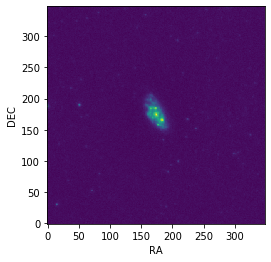

In [35]:
wimage,wheader = fits.getdata(g.image,header=True)
wcs = WCS(wheader)
plt.figure()
#plt.subplot(projection=wcs)
plt.imshow(wimage,origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')

In [48]:
g.set_image_names()

In [49]:
g.getpix()

In [50]:
g.initialize_galfit(convflag=False)

self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits


In [51]:
g.set_sersic_manual(n=2,m=10,re=10,BA=1,PA=10)

In [52]:
g.run_galfit_wise(fitBA=1,fitPA=1)

sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0388-NGC6015-unwise-w3-galfit.input.1Comp


In [53]:
g.write_results(printflag=True)

  1_XC : 175.31 +/-  0.01
  1_YC : 174.87 +/-  0.02
 1_MAG :  4.85 +/-  0.00
  1_RE : 17.24 +/-  0.02
   1_N :  0.38 +/-  0.00
  1_AR :  0.47 +/-  0.00
  1_PA : 30.70 +/-  0.07
 2_SKY : -5.07 +/-  0.94
 ERROR :  0.00
CHI2NU :  3.45


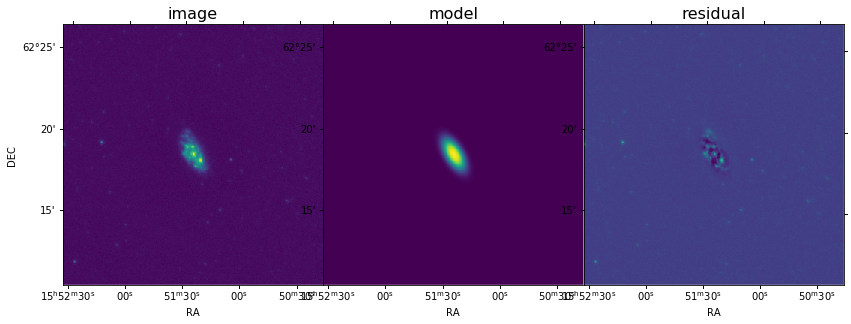

In [54]:
g.display_galfit_model()

# Analyze Galaxy in One Step #

* using a different galaxy for this part - the first in the virgo filaments catalog



In [57]:
ra = vfmain['RA'][0]
dec = vfmain['DEC'][0]
size = vfmain['radius'][0]
galname = vfmain['prefix'][0]

In [58]:
print(ra,dec,size,galname)

185.86877 74.95225 23.829847 VFID0000-NGC4363


wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85523&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(348, 348)
self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0393-NGC6015-unwise-w3-galfit.input.1Comp
1_XC  : 175.3109 +/- 0.0111
1_YC  : 174.8707 +/- 0.0189
1_MAG : 4.8494 +/- 0.0011
1_RE  : 17.2370 +/- 0.0234
1_N   : 0.3845 +/- 0.0013
1_AR  : 0.4705 +/- 0.0006
1_PA  : 30.7007 +/- 0.0672
2_SKY : -5.0654 +/- 0.9446
who's zoomin' who?
elapsed time = 5.1 sec


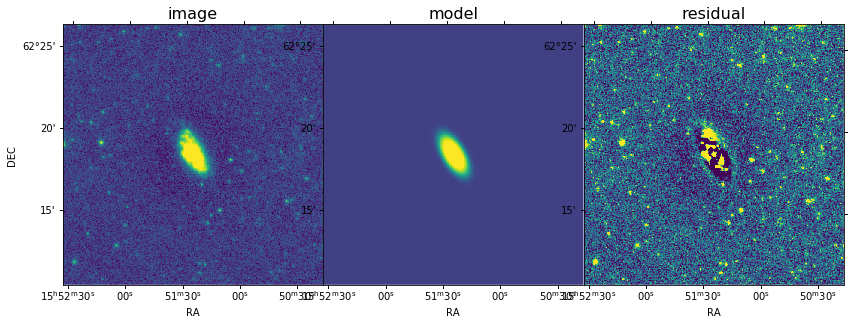

In [13]:
tic = time.perf_counter()
os.chdir(homedir+'/research/Virgo/wisesize/test/')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)
toc = time.perf_counter()
print('elapsed time = {:.1f} sec'.format(toc-tic))

# Testing Display Parameters with NGC 3945 #

In [15]:
vfindex = np.arange(len(vfmain))[vfmain['objname'] == 'NGC6015']
print(vfindex)
ra = vfmain['RA'][vfindex][0]
dec = vfmain['DEC'][vfindex][0]
size = vfmain['radius'][vfindex][0]
galname = vfmain['prefix'][vfindex][0]

[388]


wise image size =  348
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85522&dec=62.31004&size=348&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(348, 348)
self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0388-NGC6015-unwise-w3-galfit.input.1Comp
  1_XC : 175.31 +/-  0.01
  1_YC : 174.87 +/-  0.02
 1_MAG :  4.85 +/-  0.00
  1_RE : 17.24 +/-  0.02
   1_N :  0.38 +/-  0.00
  1_AR :  0.47 +/-  0.00
  1_PA : 30.70 +/-  0.07
 2_SKY : -5.07 +/-  0.94
 ERROR :  0.00
CHI2NU :  3.45


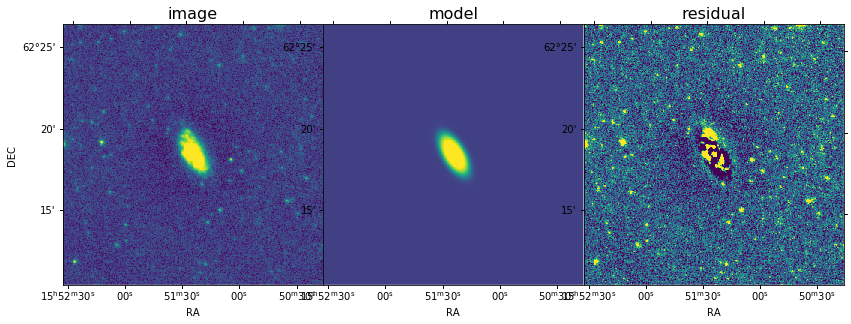

In [46]:
os.chdir(homedir+'/research/Virgo/wisesize/test/')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)

## Change the image stretch and zoom ##

I added optional arguments for display_galfit_model to allow the user to adjust some of the display settings.  The arguments are:
* percentile1 = min percentile for stretch of image and model (default=0.5)
* percentile2 = max percentile for stretch of image and model (default=99.5)
* p1residual = min percentile for stretch of residual (default=5)
* p2residual = max percentile for stretch of residual (default=99)
* cmap = colormap to use (default='viridis')
* zoom = factor to zoom image display by

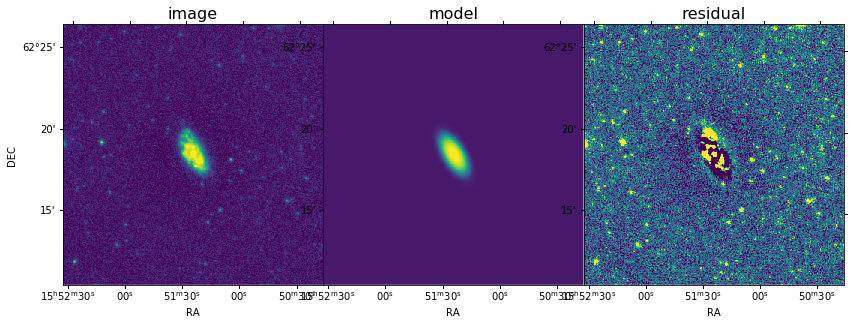

In [47]:
g.display_galfit_model(percentile1=5,percentile2=99.9)

### Example using zoom

who's zoomin' who?


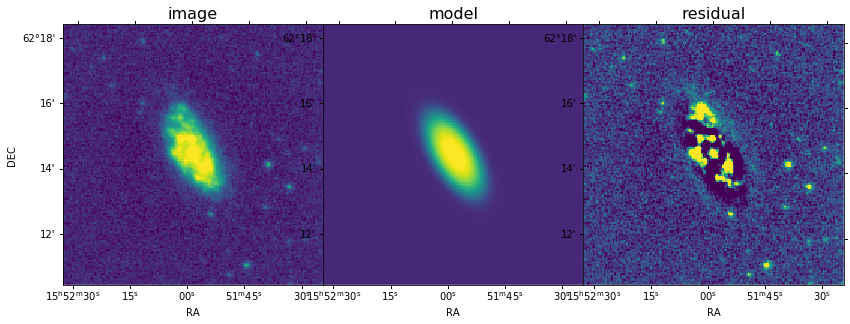

In [51]:
g.display_galfit_model(zoom=2)

# Implementing Convolution with PSF

* the PSF images are in ~/github/virgowise/wise_psfs
* the PSF image that I had been using is: 

```
        self.psf_image = homedir+'/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits' 
```


In [13]:
vfindex = np.arange(len(v.main))[v.main['objname'] == 'NGC6015']
print(vfindex)
ra = v.main['RA'][vfindex][0]
dec = v.main['DEC'][vfindex][0]
size = v.main['radius'][vfindex][0]*.5
galname = v.main['prefix'][vfindex][0]

[393]


wise image size =  174
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85523&dec=62.31004&size=174&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(174, 174)
self.psfimage =  /home/rfinn/github/virgowise/wise_psfs/wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0393-NGC6015-unwise-w3-galfit.input.1Comp
1_XC  : 88.3112 +/- 0.0170
1_YC  : 87.8783 +/- 0.0289
1_MAG : 4.8393 +/- 0.0017
1_RE  : 17.3166 +/- 0.0360
1_N   : 0.3893 +/- 0.0021
1_AR  : 0.4704 +/- 0.0010
1_PA  : 30.6793 +/- 0.1027
2_SKY : -43.1402 +/- 2.9835
who's zoomin' who?
elapsed time = 2.3 sec


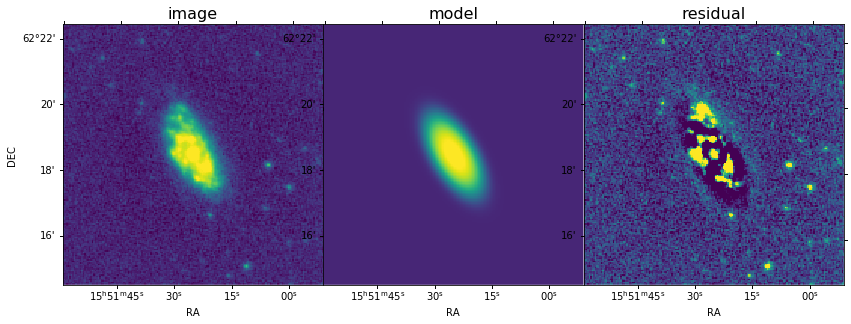

In [14]:
tic = time.perf_counter()
os.chdir(homedir+'/research/Virgo/wisesize/test/')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
g.run_simple(convflag=False)
toc = time.perf_counter()
print('elapsed time = {:.1f} sec'.format(toc-tic))

wise image size =  174
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85523&dec=62.31004&size=174&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(174, 174)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0393-NGC6015-unwise-w3-galfit.input.1Comp
1_XC  : 88.3112 +/- 0.0170
1_YC  : 87.8783 +/- 0.0289
1_MAG : 4.8393 +/- 0.0017
1_RE  : 17.3166 +/- 0.0360
1_N   : 0.3893 +/- 0.0021
1_AR  : 0.4704 +/- 0.0010
1_PA  : 30.6793 +/- 0.1027
2_SKY : -43.1402 +/- 2.9835
who's zoomin' who?
elapsed time = 1.9 sec
wise image size =  174
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=237.85523&dec=62.31004&size=174&bands=3
['unwise-2368p620-w3-img-m.fits', 'unwise-2368p620-w3-invvar-m.fits.gz', 'unwise-2368p620-w3-n-m.fits.gz', 'unwise-2368p620-w3-std-m.fits.gz']
(174

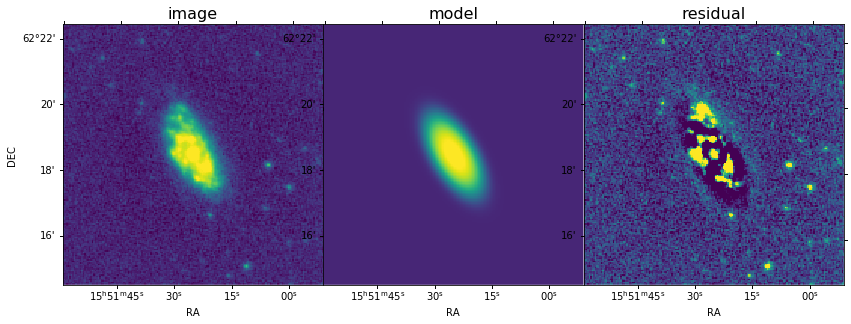

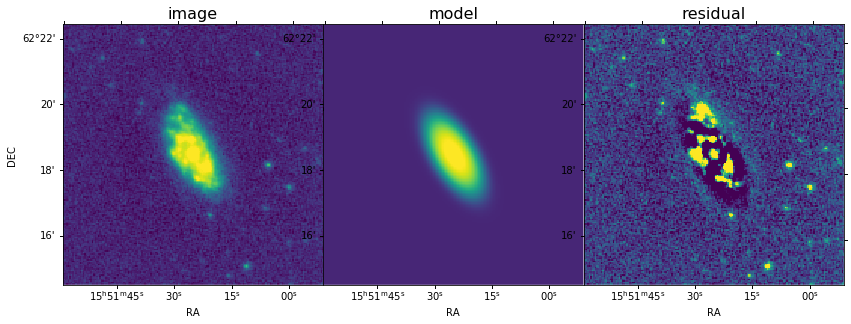

In [21]:
tic = time.perf_counter()
os.chdir(homedir+'/research/Virgo/wisesize/test/')
%run ~/github/virgowise/wisesize.py
g = galaxy(ra, dec, size,name=galname,band='3')
# start with parameters from fit with no convolution
g.set_sersic_manual()
g.run_simple(convflag=False,zoom=1)
toc = time.perf_counter()
print('elapsed time = {:.1f} sec'.format(toc-tic))

tic = time.perf_counter()
# store results from running without convolution
sersic_parameters = [g.xc,g.yc,g.mag,g.re,g.nsersic,g.BA,g.PA]
# run again with convolution enabled
g.run_simple(convflag=True,zoom=1,sersic_start=sersic_parameters)
toc = time.perf_counter()
print('elapsed time = {:.1f} sec'.format(toc-tic))


### Still To Do:
* check if image already exists before downloading
* masking
  - get list of gaia sources and mask thoses
  - will probably also need to edit mask by hand; run source extractor and then edit the mask that source extractor creates

### Already Done:

* get convolution working
* combine images if multiple are returned
* add psf images to github repository
* finish running for one galaxy!
